Q1 What is the mathematical formula for a linear SVM?

the mathematical formula for a linear svm is:

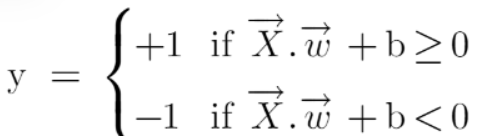

if you think of X.W as a function of x: f(x), then the above formula can be interpreted as:

If f(x) ≥ 0, the new data point is classified as positive (belonging to the positive class)

if f(x) < 0, the new data point is classified as negative (belonging to the negative class).

Q2 what is the objective function of a linear svm?

the objective function of a linear svm is

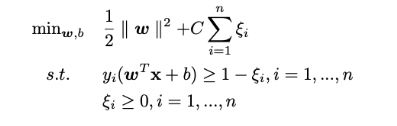

where ||w|| is the Euclidean norm of the weight vector w, b is the bias term, and yᵢ is the class label of the i-th data point, with yᵢ ∈ {-1, 1}.

Q3 what is the kernal trick in svm?

The kernel trick is a technique used in Support Vector Machines (SVM) to transform data from a lower-dimensional space to a higher-dimensional space without explicitly computing the coordinates of the data in the higher-dimensional space. This technique allows SVM to effectively deal with non-linearly separable datasets.

The idea behind the kernel trick is to replace the dot product between two vectors in the higher-dimensional space with a kernel function that computes the similarity between the two vectors in the original lower-dimensional space. This means that SVM can operate in the higher-dimensional space without explicitly computing the coordinates of the data in that space.

Q4 what is the role of support vectors in SVM ?

Support vectors are important because they are the critical data points that affect the position and orientation of the decision boundary. Changing the position or the label of a non-support vector will not affect the decision boundary or the margin. However, changing the position or the label of a support vector may change the decision boundary and the margin.

For example, consider a two-dimensional classification problem where the goal is to classify the data points into two classes, red and blue, based on their coordinates (x, y). The following figure shows a set of training data points and the decision boundary (solid line) found by SVM:



Q5 Hyperplane:

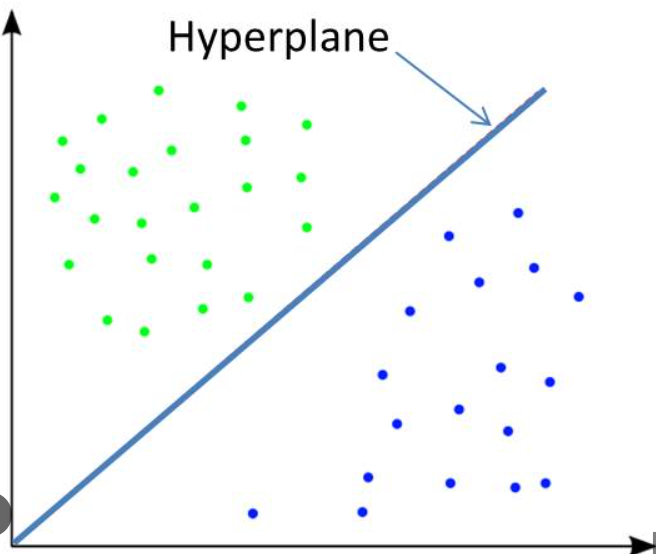

The hyperplane is the decision boundary that separates the two classes. In a two-dimensional space, the hyperplane is a line. The following graph shows an example of a hyperplane that separates the green and blue classes:



Marginal plane:

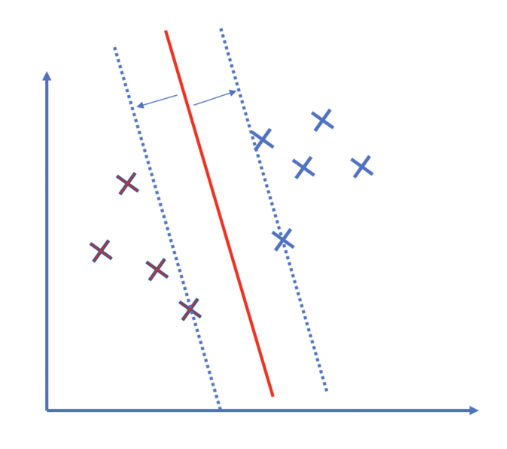

The marginal plane is a plane that is parallel to the hyperplane and is located at a distance of 1/magnitude(w) from the hyperplane, where w is the weight vector of the hyperplane. The marginal plane is used to compute the margin of the hyperplane, which is the distance between the hyperplane and the closest data point of either class. The following graph shows an example of a marginal plane (the dotted blue lines):



Soft margin:

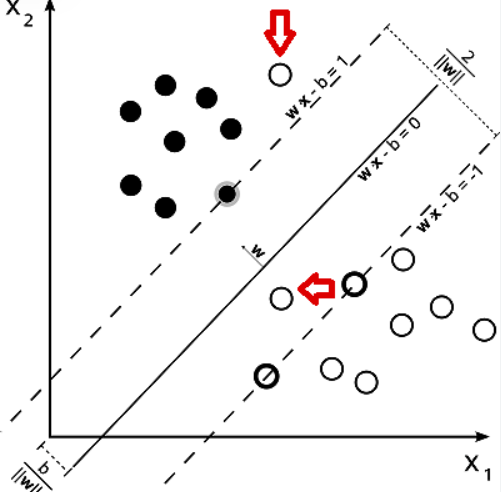

In real-world applications, it is rare to have a linearly separable dataset, which means that the hyperplane cannot perfectly separate the two classes. In such cases, we use a soft margin, which allows some misclassification errors to occur. The soft margin allows some data points to be on the wrong side of the margin, but penalizes them for being too far from the margin. The following graph shows an example of a soft margin:

Hard margin:

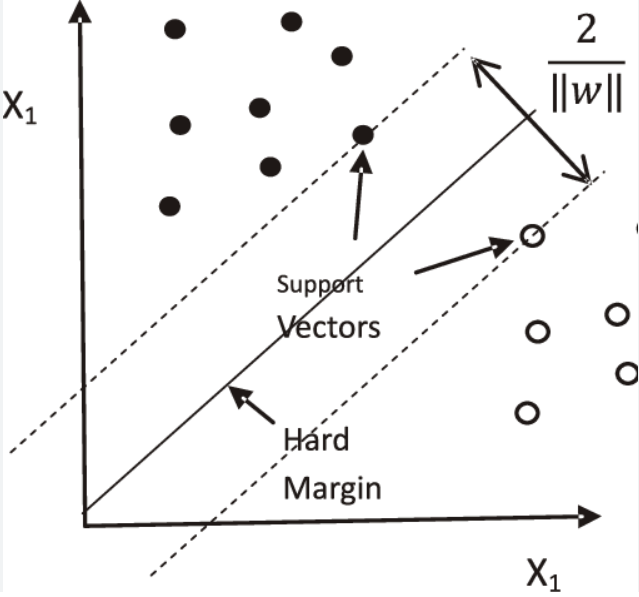

In some cases, it may be possible to find a hyperplane that perfectly separates the two classes without any misclassification errors. This is called a hard margin, and it only works for linearly separable datasets. The following graph shows an example of a hard margin:



Q6SVM Implementation through Iris dataset.

Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl

Train a linear SVM classifier on the training set and predict the labels for the testing setl

Compute the accuracy of the model on the testing setl

Plot the decision boundaries of the trained model using two of the featuresl

Try different values of the regularisation parameter C and see how it affects the performance of the model.

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target #{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
y = df.pop('target')
x = df

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=43)

In [5]:
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')

clf = LinearSVC(random_state=43)
clf.fit(x_train, y_train)

LinearSVC(random_state=43)

In [6]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


Remarks on the acuracy score:

The model is clearly overfitting.

We can address this isse by regularizing the model. We can regularize an SVM by adjusting the C parameter. The C parameter controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C leads to stronger regularization, which can help prevent overfitting. You can experiment with different values of C to find the best one for your dataset

In [7]:
#trying different values of C parameter

c_values = [0.1, 0.5, 1, 10, 100, 1000]

for each_c_value in c_values:
    clf = LinearSVC(C=each_c_value, random_state=43)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy at C={each_c_value}:", accuracy)

Accuracy at C=0.1: 1.0
Accuracy at C=0.5: 1.0
Accuracy at C=1: 1.0
Accuracy at C=10: 1.0
Accuracy at C=100: 1.0
Accuracy at C=1000: 0.9333333333333333


Remarks on different values of the C parameters:

Looks like the model finally overcame the overfitting issue at higher value of C (1000)